In [ ]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
import os
import numpy

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AmericanTweets.csv to AmericanTweets.csv


Reading the data from the .csv file

In [ ]:
import io
Tweet= pandas.read_csv(io.BytesIO(uploaded['AmericanTweets.csv']))
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
del Tweet['tweet_coord']
del Tweet['airline_sentiment_gold']
del Tweet['negativereason_gold']

In [ ]:

Countmood = Tweet['airline_sentiment'].value_counts()

The above line is to count the total moods using the airline_sentiment column from the table

Text(0.5, 1.0, 'Count of total Positive,Negative and Neutral Moods')

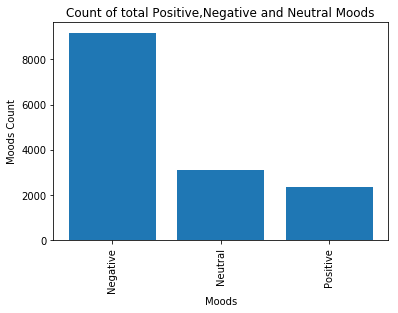

In [ ]:
Index = [1,2,3]
plt.bar(Index,Countmood)
plt.xticks(Index,['Negative','Neutral','Positive'],rotation=90)
plt.ylabel('Moods Count')
plt.xlabel('Moods')
plt.title('Count of total Positive,Negative and Neutral Moods')

Total no.of values for each of the airline can be displayed using the below line

In [ ]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

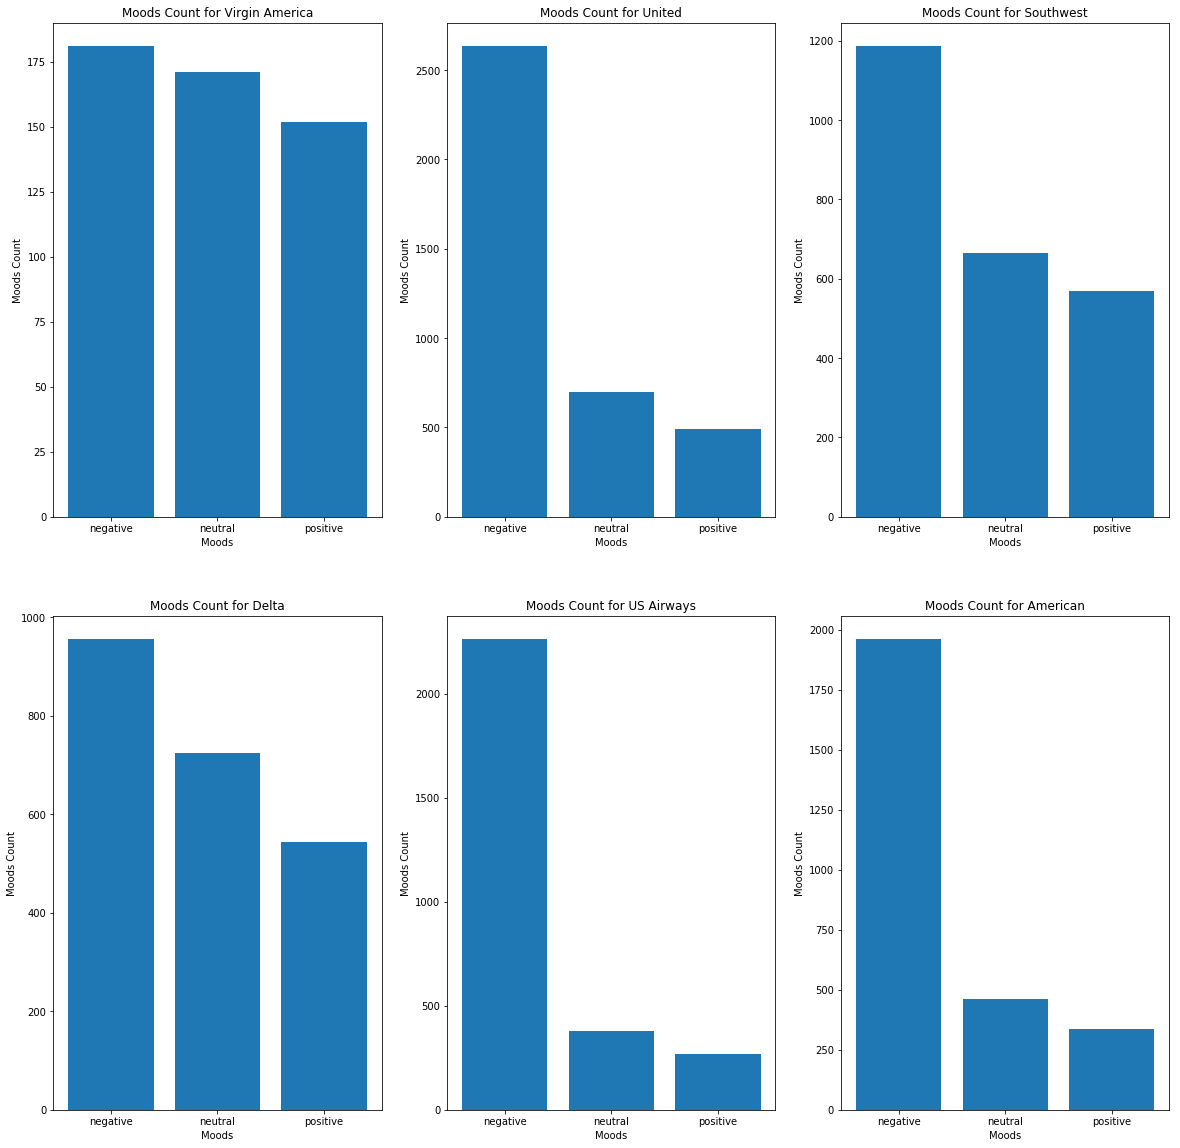

In [ ]:
def bargraph_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Moods Count')
    plt.xlabel('Moods')
    plt.title('Moods Count for '+Airline)
    
plt.figure(1,figsize=(20, 20))
plt.subplot(231)
bargraph_sub_sentiment('Virgin America')
plt.subplot(232)
bargraph_sub_sentiment('United')
plt.subplot(233)
bargraph_sub_sentiment('Southwest')
plt.subplot(234)
bargraph_sub_sentiment('Delta')
plt.subplot(235)
bargraph_sub_sentiment('US Airways')
plt.subplot(236)
bargraph_sub_sentiment('American')

We can understand from the abpve graphs that US Airways, United and American have leaning towards negative moods where as Delta, Virgin America and Southwest have more of a balanced moods.

In [ ]:
Negative_Reason_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [ ]:
def Negative_Reason_Count(Airline):
    if Airline=='All':
        df=Tweet
    else:
        df=Tweet[Tweet['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Reason=list(Tweet['negativereason'].unique())
    Reason=[x for x in Reason if str(x) != 'nan']
    Reason_frame=pandas.DataFrame({'Reasons':Reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

In [ ]:
def plot_Reason(Airline):
    df=Negative_Reason_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    plt.show()

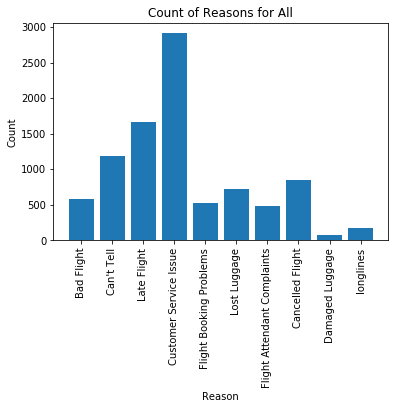

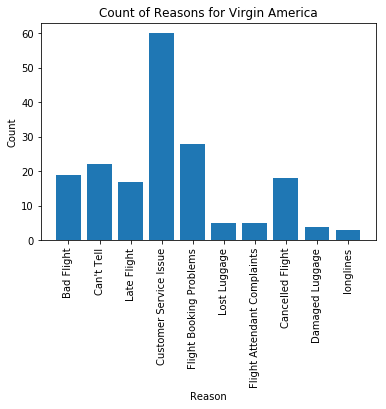

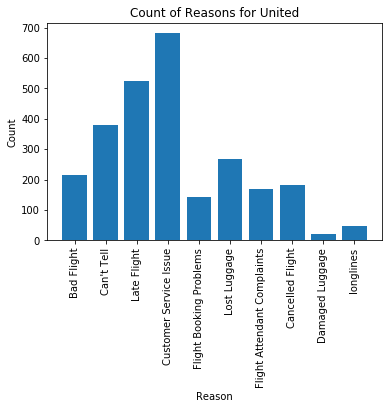

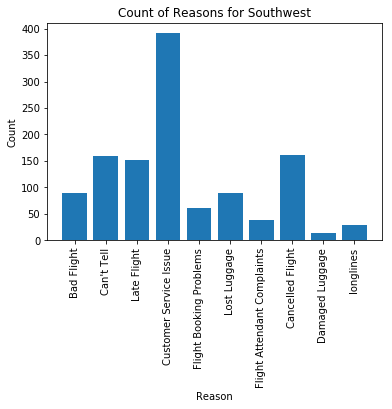

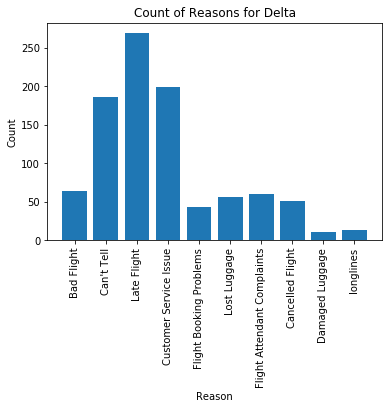

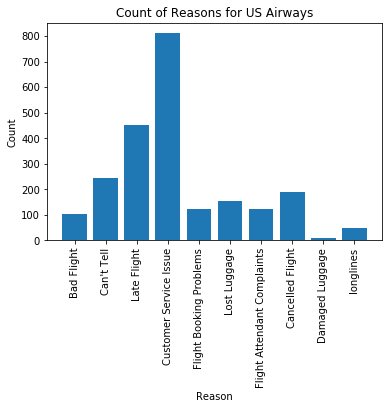

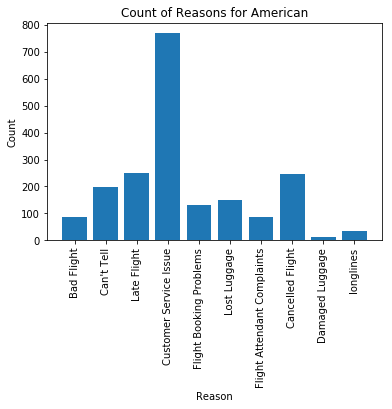

In [ ]:
Airline_Names = ['All', 'Virgin America', 'United', 'Southwest', 'Delta', 'US Airways','American']
for Airline_Name in Airline_Names:
    plot_Reason(Airline_Name)

In [ ]:
!pip install fastai

In [ ]:
from fastai.gen_doc.nbdoc import *
from fastai.text import *

PREPROCESSING STEPS

In [ ]:
def label(x):
  if x=='negative':
    return -1
  elif x=='positive':
    return 1
  return 0
Tweet['label']=Tweet['airline_sentiment'].apply(label)
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,label
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2/24/2015 11:35,NaN,Eastern Time (US & Canada),0
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2/24/2015 11:15,NaN,Pacific Time (US & Canada),1
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2/24/2015 11:15,Lets Play,Central Time (US & Canada),0
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2/24/2015 11:15,NaN,Pacific Time (US & Canada),-1
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2/24/2015 11:14,NaN,Pacific Time (US & Canada),-1


In [ ]:
df = pandas.DataFrame(Tweet[['label','text']])
df.head()

,label,text
0,0,@VirginAmerica What @dhepburn said.
1,1,@VirginAmerica plus you've added commercials t...
2,0,@VirginAmerica I didn't today... Must mean I n...
3,-1,@VirginAmerica it's really aggressive to blast...
4,-1,@VirginAmerica and it's a really big bad thing...


In [ ]:
df['is_valid'] = False
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,label,text,is_valid
0,-1,@AmericanAir car accident on my way to the air...,False
1,-1,@USAirways redeemed themselves! Flight out a...,False
2,0,@SouthwestAir did you know that suicide is the...,False
3,-1,@united thanks for causing us to miss our conn...,False
4,-1,@united Thanks...seat made for a 6 year old an...,False


In [ ]:
train_df = df[df['is_valid']==False]
valid_df = df[df['is_valid']==True]

In [ ]:
path = ""
for file in ['train_tok.npy', 'valid_tok.npy']:
  if os.path.exists(path+'tmp'+file): os.remove(path+'tmp'+file)

In [ ]:
data_language_model = TextLMDataBunch.from_df(train_df=train_df, valid_df=valid_df, path=path)
data_classifier_model = TextClasDataBunch.from_df(path=path, train_df=train_df, valid_df=valid_df, vocab=data_language_model.train_ds.vocab, bs=32)

We can use the data_language_model object we created earlier to fine-tune a pretrained language model.

In [ ]:
learn = language_model_learner(data_language_model, arch=AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

We can fine tune the model by unfreezing it 

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

To evaluate our language model we can use the code below.



In [ ]:
learn.predict("This is about a evaluation on")

(Category 0, tensor(1), tensor([0.3298, 0.5700, 0.1002]))

The first 2 elements of the tuple are the predicted class and label respectively.Label here is essentially an internal representation of each class,since class name is a string and cannot be used in computation.

We can save the encoder now in order to use it for classifaction in the next part

In [ ]:
learn.save_encoder('enc')

We now use the data_classifier_model object we created earlier to build a classifier


In [ ]:
learn = text_classifier_learner(data_classifier_model,AWD_LSTM, drop_mult=0.5)
learn.load_encoder('enc')

In [ ]:
data_classifier_model.show_batch()

text,target
xxbos @united xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,0
xxbos @usairways xxup plans xxup changed ! xxup is xxup that xxup what u xxup call xxup not xxup bein xxup able 2 xxup park xxup on xxup time xxup planes w a 2 xxup hr xxup layover n b xxup able 2 xxup make xxup ur xxup connection ! # seriously,-1
xxbos @usairways xxup fuk u xxup us xxup airways xxup with xxup yo xxup shitty xxup chicken xxup xxunk xxup sandwich xxup that xxup so xxup overpriced xxup and u xxup xxunk xxup make xxup me xxup wait xxup in a 6 xxup hr xxup layover xxup fuk u xxup and,-1
xxbos @united xxunk 7 xxup weeks xxmaj late flightr xxup and i xxup still xxup have xxup not xxup received xxup my xxup miles xxup from xxup the mileageplus xxmaj gift xxmaj card $ 150 xxup xxunk xxup card i xxup handed xxup over ! ! !,-1
"xxbos @usairways i need help . xxmaj in air on # xxunk to xxup clt from xxup phl . xxmaj conf : xxup xxunk xxmaj need confirmed on # 1776 to xxup bna at 10:30 . xxmaj been bumped all day , need home",-1


In [ ]:
learn.fit_one_cycle(1, 1e-2)

We can unfreeze this to fine tune it

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

We can again evaluate our language model

In [ ]:
learn.predict("The flight was great")

(Category 1, tensor(2), tensor([0.2165, 0.2138, 0.5697]))

There is **#na#** displayed because the training rate is too high or probably becuase I used Google colab (GPU).I idd get the correct correct valid_loss and accuracy displayed the first time around but started displaying #na# after an hour.